In [ ]:
import pandas as pd

df = pd.read_csv('/content/Customer Purchase.csv')

df.head()

,Gender,Monthly Income,Brand Awareness,Quality Rating,Purchase
0,Male,28000,1,2,NO
1,Female,30000,2,3,NO
2,Male,32000,2,2,NO
3,Female,35000,3,3,NO
4,Male,37000,3,4,YES


In [ ]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df.head()

,Gender,Monthly Income,Brand Awareness,Quality Rating,Purchase
0,0,28000,1,2,NO
1,1,30000,2,3,NO
2,0,32000,2,2,NO
3,1,35000,3,3,NO
4,0,37000,3,4,YES


In [ ]:
df['Purchase'] = df['Purchase'].map({'Yes': 1, 'No': 0})
df.head()

,Gender,Monthly Income,Brand Awareness,Quality Rating,Purchase
0,0,28000,1,2,NaN
1,1,30000,2,3,NaN
2,0,32000,2,2,NaN
3,1,35000,3,3,NaN
4,0,37000,3,4,NaN


In [ ]:
print(df['Purchase'].unique())
print(df.head())

[nan]
   Gender  Monthly Income  Brand Awareness  Quality Rating  Purchase
0       0           28000                1               2       NaN
1       1           30000                2               3       NaN
2       0           32000                2               2       NaN
3       1           35000                3               3       NaN
4       0           37000                3               4       NaN


In [ ]:
df['Purchase'] = df['Purchase'].map({'YES': 1, 'NO': 0})
df.head()

,Gender,Monthly Income,Brand Awareness,Quality Rating,Purchase
0,0,28000,1,2,NaN
1,1,30000,2,3,NaN
2,0,32000,2,2,NaN
3,1,35000,3,3,NaN
4,0,37000,3,4,NaN


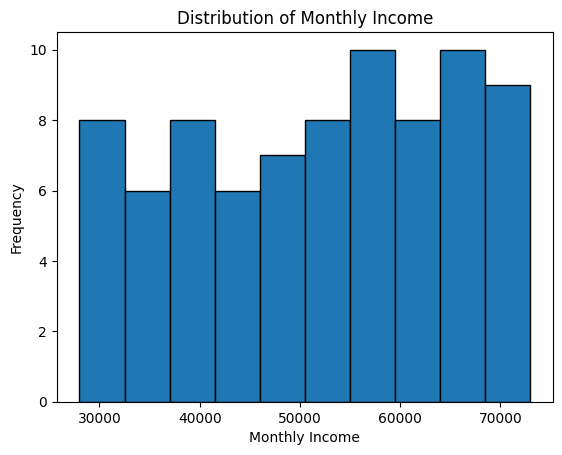

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['Monthly Income'], bins=10, edgecolor='black')
plt.title('Distribution of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.show()


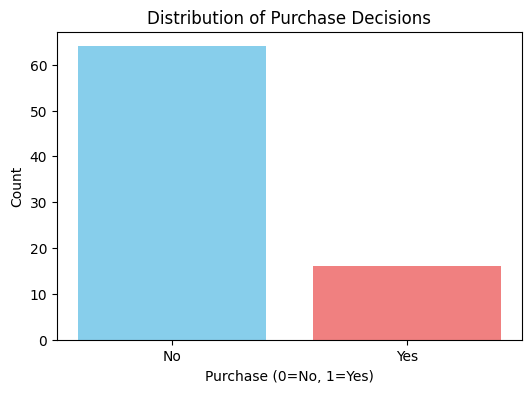

In [ ]:
purchase_counts = df['Purchase'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(purchase_counts.index.astype(str), purchase_counts.values, color=['skyblue', 'lightcoral'])
plt.title('Distribution of Purchase Decisions')
plt.xlabel('Purchase (0=No, 1=Yes)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

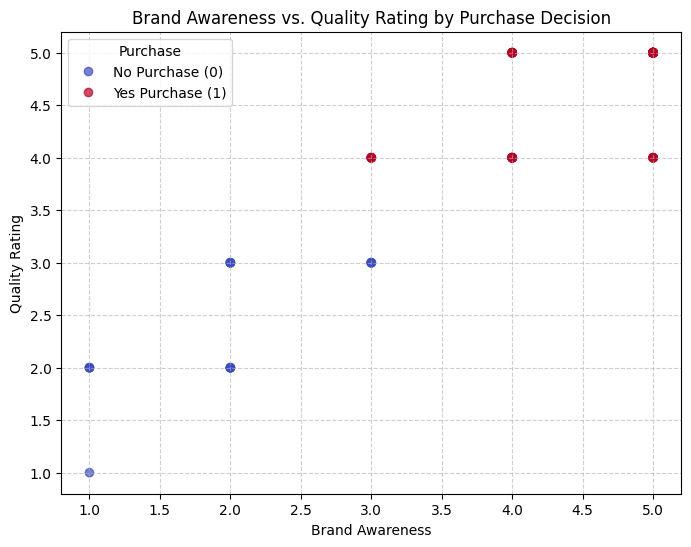

In [ ]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['Brand Awareness'], df['Quality Rating'], c=df['Purchase'], cmap='coolwarm', alpha=0.7)
plt.title('Brand Awareness vs. Quality Rating by Purchase Decision')
plt.xlabel('Brand Awareness')
plt.ylabel('Quality Rating')
legend_labels = ['No Purchase (0)', 'Yes Purchase (1)']
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Purchase')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Purchase', axis=1)


y = df['Purchase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (56, 4)
X_test shape: (24, 4)
y_train shape: (56,)
y_test shape: (24,)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


y_pred = model.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy Score: {accuracy:.4f}")

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[ 4  0]
 [ 1 19]]

Accuracy Score: 0.9583

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.95      0.97        20

    accuracy                           0.96        24
   macro avg       0.90      0.97      0.93        24
weighted avg       0.97      0.96      0.96        24



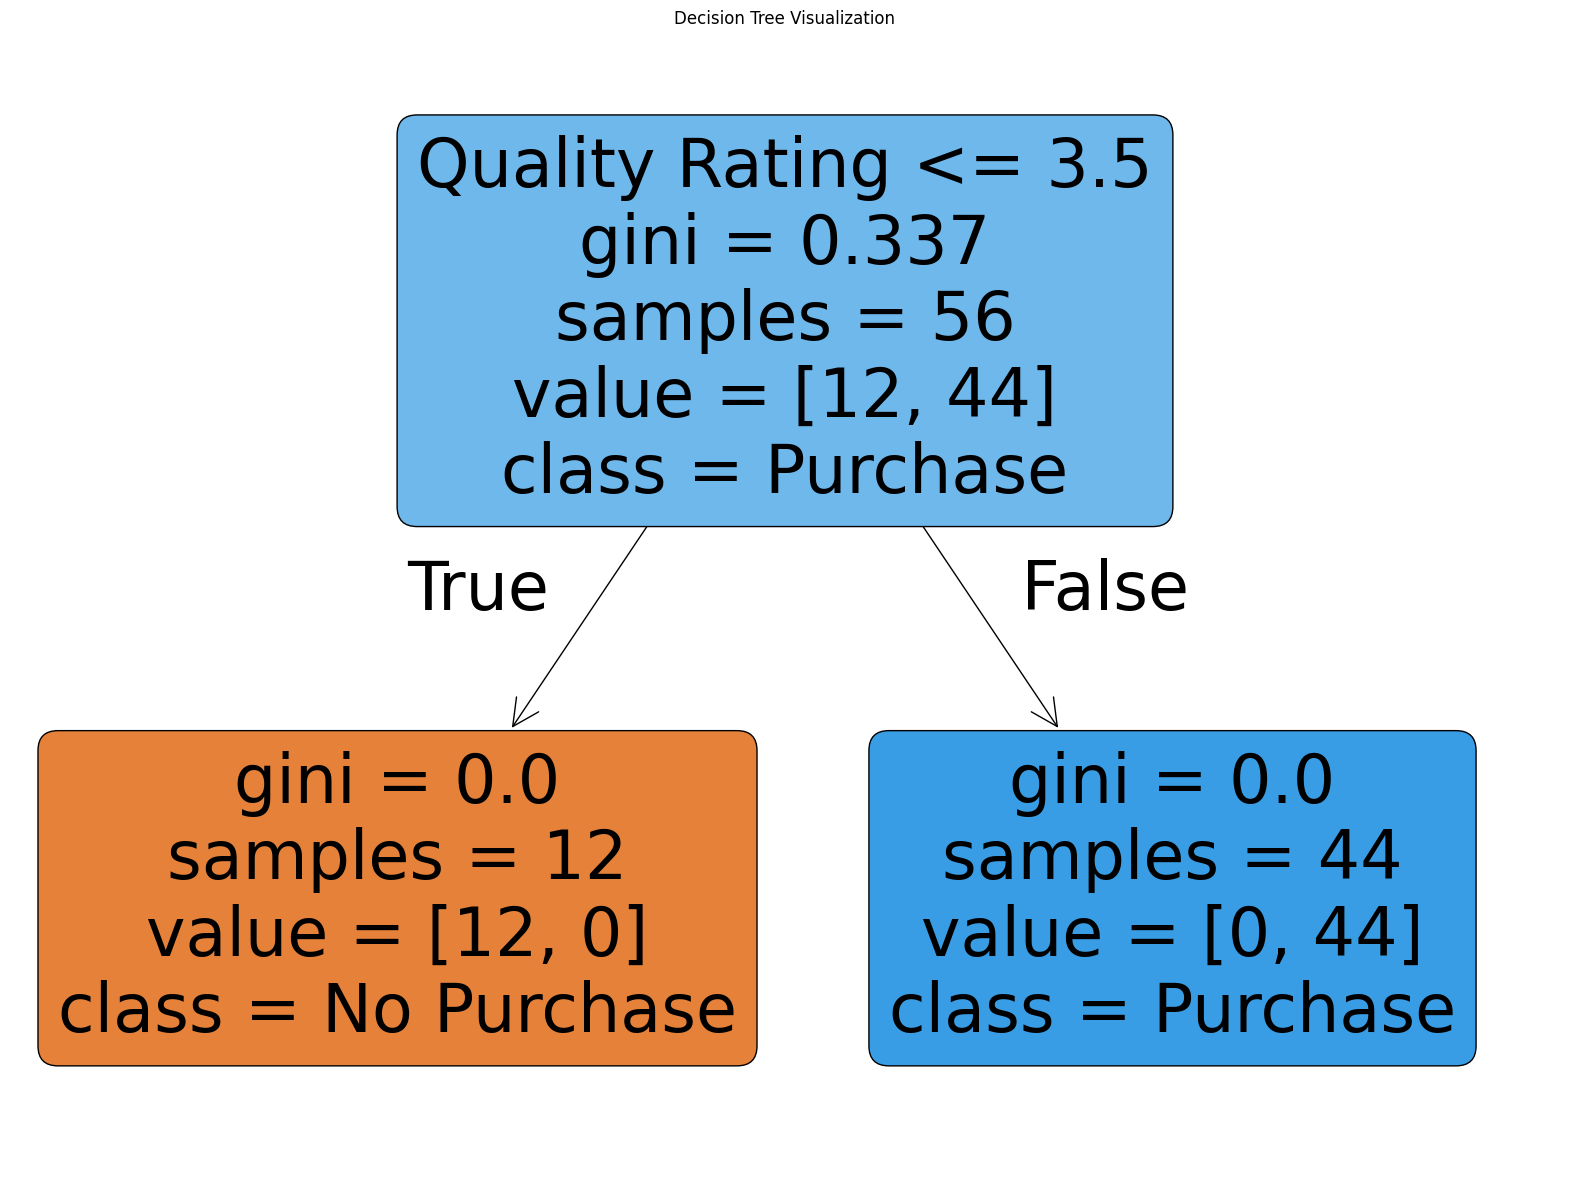

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


plt.figure(figsize=(20,15))


plot_tree(dt_model,
          feature_names=X_train.columns,
          class_names=['No Purchase', 'Purchase'],
          filled=True,
          rounded=True)

plt.title('Decision Tree Visualization')

plt.show()